> [source](https://inferentialthinking.com/chapters/12/1/AB_Testing.html)

# 12.1. A/B Testing

In modern data analytics, deciding whether two numerical samples come from the same underlying distribution is called A/B testing. The name refers to the labels of the two samples, A and B.

We will develop the method in the context of an example. The data come from a sample of newborns in a large hospital system. We will treat it as if it were a simple random sample though the sampling was done in multiple stages. Stat Labs by Deborah Nolan and Terry Speed has details about a larger dataset from which this set is drawn.

## 12.1.1. Smokers and Nonsmokers

The table births contains the following variables for 1,174 mother-baby pairs: the baby’s birth weight in ounces, the number of gestational days, the mother’s age in completed years, the mother’s height in inches, pregnancy weight in pounds, and whether or not the mother smoked during pregnancy.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
births = pd.read_csv('baby.csv')

In [5]:
births.head()

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False


One of the aims of the study was to see whether maternal smoking was associated with birth weight. Let’s see what we can say about the two variables.

We’ll start by selecting just Birth Weight and Maternal Smoker. There are 715 non-smokers among the women in the sample, and 459 smokers.

In [6]:
births['Maternal Smoker'].value_counts()

False    715
True     459
Name: Maternal Smoker, dtype: int64

Let’s look at the distribution of the birth weights of the babies of the non-smoking mothers compared to those of the smoking mothers. To generate two overlaid histograms, we will use hist with the optional group argument which is a column label or index. The rows of the table are first grouped by this column and then a histogram is drawn for each one.

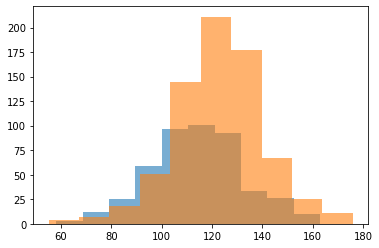

In [43]:
smoke = births.loc[births['Maternal Smoker']==True, 'Birth Weight']
dont_smoke = births.loc[births['Maternal Smoker']==False, 'Birth Weight']
plt.hist(smoke, alpha=0.6, label='smoke')
plt.hist(dont_smoke, alpha=0.6, label='dont_smoke')
plt.show()


The distribution of the weights of the babies born to mothers who smoked appears to be based slightly to the left of the distribution corresponding to non-smoking mothers. The weights of the babies of the mothers who smoked seem lower on average than the weights of the babies of the non-smokers.

This raises the question of whether the difference reflects just chance variation or a difference in the distributions in the larger population. Could it be that there is no difference between the two distributions in the population, but we are seeing a difference in the samples just because of the mothers who happened to be selected?

## 12.1.2. The Hypotheses

We can try to answer this question by a test of hypotheses. The chance model that we will test says that there is no underlying difference in the populations; the distributions in the samples are different just due to chance.

Formally, this is the null hypothesis. We are going to have to figure out how to simulate a useful statistic under this hypothesis. But as a start, let’s just state the two natural hypotheses.

**Null hypothesis**: In the population, the distribution of birth weights of babies is the same for mothers who don’t smoke as for mothers who do. The difference in the sample is due to chance.

**Alternative hypothesis**: In the population, the babies of the mothers who smoke have a lower birth weight, on average, than the babies of the non-smokers.

## 12.1.3. Test Statistic

The alternative hypothesis compares the average birth weights of the two groups and says that the average for the mothers who smoke is smaller. Therefore it is reasonable for us to use the difference between the two group means as our statistic.

We will do the subtraction in the order “average weight of the smoking group 
 average weight of the non-smoking group”. Small values (that is, large negative values) of this statistic will favor the alternative hypothesis.

The observed value of the test statistic is about -9.27 ounces.

In [ ]:
##